# Week 1 Pandas Basics - Row, Column, Apply, Groupby, Aggregation Operations

<img align="right" style="padding-right:10px;" src="figures_wk1/textbook_cover.png" width=300><br>
**Book recommendation**: "Pandas for Everyone" by Daniel Y. Chin. <br>
>**Publisher**: Addison-Wesley Professional; 1st edition (December 26, 2017)<br>
>**ISBN-13**: 978-0134546933<br>
>**ISBN-10**: 0134546938<br>

Excellent Pandas resource. We use it as the textbook for MSDE 620.<br>

Outline:

1. Title
2. Overview
3. Why Python?
4. Why Pandas?
5. Basic Pandas Operations<br>
    5.1. Data files and file loading<br>
    5.2. Dataframes<br>
        5.2.1. Descriptive Statistics
        5.2.2. Rows
        5.2.3. Columns
        5.2.4. Slices
        5.2.5. Deleting rows and columns 
    4. 
    5. 
6. Apply 
7. Aggragating
8. Groupby<br>
    8.1. Descriptive Statistics
    8.2. Counting

# Data Analytics Overview
Data analytics is the science of analyzing raw data to make conclusions about that information. Any type of data can be subjected to data analytics techniques to get insight that can be used to improve things. All data analysis stems from a question(s) that are then analyzed through various data analytic techniques. Any type of data can be subjected to data analytics techniques to get insight that can be used to improve things. Data analytic techniques can reveal trends and metrics that would otherwise be lost in the mass of information. This information can then be used to optimize processes to increase the overall efficiency of a business or system.

## Data Analytic Tools
Data science analysis tasks can be done in a variety of different programming languages and programs. Each one has pros and cons which must be evaluated against the tasks being performed, knowledge and skill of the analyst, type of data being analyzed, etc. Historically, the two most popular languages are **R** and **Python**. Over time we have seen a shift in popularity from R to Python, possibly as a consequence of data science moving out of the realm of pure statistics and incorporating more algorithmic, programming-heavy tasks such as machine learning. 

This week we will introduce the "Swiss army knife" of data analysis in Python -- **Pandas**. We start by discussing advantages of using Python and Pandas in data science, followed by basic dataframe operations, and finish with some analysis using grouping and aggragating functions. 

At the end of this unit, the student should be able to load tabular data files and perform rudimentary analysis. The student should also have a solid foundation from which to use online resources to find more advanced techniques. 

# Why Python?

<img align="right" style="padding-right:10px;" src="figures_wk1/languages.png" width=800><br>

Python is a free, open source, general-purpose programming language that has been in existence since 1991. It is already known and in use by millions of programmers and relatively easy to learn for those new to the language. Since it is a general-purpose language, it can be used for more than just analysis.

R is a free, open source statistical analysis package made popular by university researchers due to the low cost of ownership. Being a specialized language, it can be difficult to learn, particularly for those who already know programming. While R is, indeed, superior at the statistics aspect, it falls short of Python in both data manipulation ("data wrangling") and machine learning, and it is not really possible to write an "R program" that stands alone as can be done with Python. This means in many business contexts when analytical code is deployed for general usage, it must be translated from R to another language.  



*Reference: https://www.datasciencecentral.com/profiles/blogs/best-languages-for-data-science-and-statistics-in-one-picture*

# Why Pandas?

As mentioned in the Overview, the Pandas library is the "Swiss army knife," or all-purpose tool, used in manipulating row - column oriented data. It is popularly said in the data science community that 70% or more of a data scientist's time is spent "wrangling data" -- cleaning, transforming, etc.

Under the covers, Pandas relies on the high-performance Numpy mathematical library for many of its operations and over the years has been refined and optimized to be exceptionally good at its purpose. 

Pandas makes it very easy to operate on rows, columns, or entire tables (called **dataframes**). 

# Basic Pandas Operations

We will use the popular "Titanic" data set for the following demonstrations.

## Look at your data

The first step in any type of data analysis is to **look** at your data.

The actual data file is in the data_wk1 directory (if you downloaded the notebook and data files), and is called `titanic.csv`. The `.csv` means that the file is Comma Separated Values, which means the file is already organized in row and column format. Usually (**but not always**) the first row is a header row that contains the column names. 

I **strongly** encourage you to look at the data file in a programmer's text editor. **NOT** Notepad. **NOT** Excel. Those programs manipulate the view of the data in subtle ways that can cause problems.

You can also look at the first few rows of your dataset from within a Jupyter notebook.  However, this **does not replace** the need to visually inspect **the entire dataset** outside of your notebook.

In [4]:
!head data_wk1/titanic.csv

SyntaxError: invalid syntax (Temp/ipykernel_17644/4229407008.py, line 1)

<div class="alert alert-block alert-info">
<b>Helpful Hint::</b> You can execute os commands from within your notebook by starting the command with '!'.  <br> <br>
For example, to list out al the files in a directory,<br>
* On a PC:  type '!dir' <br>
* On a MAC: type '!ls' <br>
</div>

## Data files and file loading

We first have to import the Pandas library. You only have to do imports once per notebook.

In [2]:
import pandas as pd
import seaborn as sns   # This and next line to make graphs look better

sns.set()

Let's load the data into a dataframe:

In [3]:
df = pd.read_csv('data_wk1/titanic.csv')

## Dataframes

A dataframe can be considered to be a representation of the data in table form. Dataframes have rows and columns. Each row can be cansidered an "observation" in terms of experimentation, or as one complete data point. Each column represents a "variable" or "feature" that can be measured, quantified, or qualified in some way. These terms will become clearer as we look at our example data.

First, let's look at the size of the dataframe.

In [4]:
df.shape

(891, 15)

This tells us there are 891 rows and 15 columns. 

The `(891, 15)` is called a **tuple**. According to Wikipedia, the name comes from naming the numeric progression: single, double, triple, quadruple, quadruple, quintuple, sextuple, septuple, octuple, ..., n‑tuple, ..., . (https://en.wikipedia.org/wiki/Tuple)

Anyway, they are just like lists except you can't change them. So, to access the first element:

In [5]:
df.shape[0]

891

Let's look at the first few rows:

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


And the bottom of the data:

In [7]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Now, the column names:

In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Descriptive Statistics

Descriptive statistics are used to describe basic features of the data in a study. When describing a single variable (univariate analysis), or column in our case, descriptive statistics are:

* Distribution
* Central tendency
* Dispersion

Before we do anything fancy, though, let's look at some facts about each column:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


On the second line down, we see `RangeIndex: 891 entries, 0 to 890` meaning we have 891 rows in the dataframe. 

After that we have a list of each column, how many **non-null** values are in it(this will be important later), and what data type the column is. 

Next, we can look at distribution with a histogram:

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

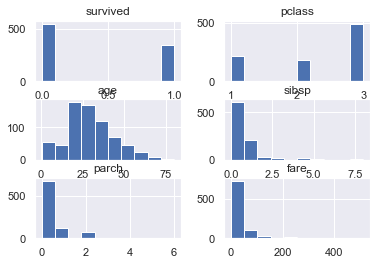

In [10]:
df.hist()

That is a little cramped. Let's just take one of those -- age:

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

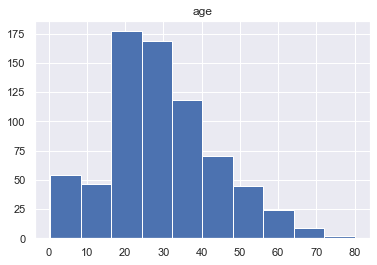

In [11]:
df.hist(column='age')

Pandas chose the number of bins for us but we could have stated it explicitly also, like so:

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

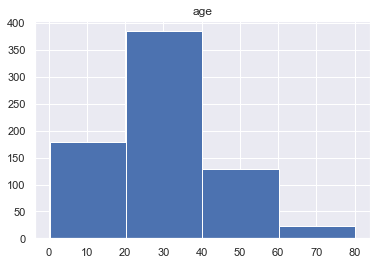

In [12]:
df.hist(column='age', bins=4)

Finally, we can look at central tendency and dispersion with the `describe()` function:

In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


That might be easier to look at if it was rotated (Transposed):

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Or, if you would like to see that in a box and whisker plot:

<AxesSubplot:>

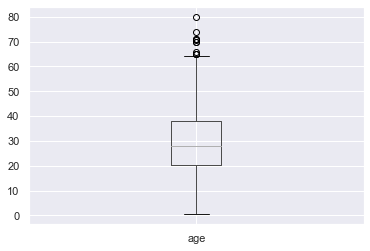

In [15]:
df.boxplot('age')

### Rows

There are a few different ways to work with rows, some of which can be a bit confusing. Probably the easiest and safest way to refer to rows is to use their index number (although sometimes that number can be hidden. That is outside the scope of this class).

If we wanted to look at the first row, an easy way to do so would be to use `iloc[]`:

In [16]:
df.iloc[0]

survived                 0
pclass                   3
sex                   male
age                   22.0
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object

Notice that `iloc[]` has square brackets on the end, **NOT** parentheses. This makes looking at multiple rows look a little weird:

In [17]:
df.iloc[[1, 10, 100]] # Two sets of square brackets?

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
100,0,3,female,28.0,0,0,7.8958,S,Third,woman,False,NaN,Southampton,no,True


Since `iloc[]` uses square brackets, when we pass a **list** to it, like we did above, it gives the double-square bracket syntax.

### Columns

We saw earlier how to get a list of column names:

In [18]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Columns can also be referenced by name:

In [19]:
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

And you can specify groups of columns with lists:

In [20]:
df[ ['survived','pclass','age'] ].head() # Notice double square brackets again

,survived,pclass,age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0


### Slices

A slice of some container, like a list or dataframe, just means a section or segment of that container. 

Some examples -- remember, a string is just a list of characters...

In [21]:
import string

In [22]:
alpha = string.ascii_letters
alpha

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

A slice of the first five characters:

In [23]:
alpha[0:5]

'abcde'

And, since the default starting position is 0, above is equivalent to this:

In [24]:
alpha[:5]

'abcde'

To get the last character:

In [25]:
alpha[-1]

'Z'

The last 5:

In [26]:
alpha[-5:]

'VWXYZ'

When we start discussing more dimensions, like nested lists or dataframes (tables), things get more complicated. The syntax looks like this:

```
df[ row_start : row_stop, column_start : column_stop ]
```

So, if you wanted rows 5, 6, 7 and all columns:

In [27]:
df.iloc[5:8, :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


If we wanted all rows but only the first two columns:

In [28]:
df.iloc[:, 0:2]

,survived,pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


### Deleting rows and columns

In the course of cleaning up the data, we often have to remove rows or columns. This is accomplished with the `drop()` function.

First, let's make a copy of the dataframe so we don't mess up our original data. 

In [29]:
df_copy = df.copy()

Now, let's drop the first row of the copy:

In [30]:
df_copy.drop(df_copy.index[0])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [31]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


What happened? The `drop()` showed us the dataframe without the row, but `head()` shows it still there? 

`drop()` returns the dataframe with the row(s) or column(s) dropped, but does not change the actual dataframe. To make a permanent change you have 2 choices:

`df_copy.drop(df_copy.index[0], inplace=True)`

or

`df_copy = df_copy.drop(df_copy.index[0])`

Both methods have advantages. In this case, I know we won't ever want that row back, so I'll use `inplace=True`.

In [32]:
df_copy.drop(df_copy.index[0], inplace=True)

In [33]:
df_copy.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


Now, let's look at columns. As we saw above, a couple of the columns have very few actual values. Let's look at that graphically:

<AxesSubplot:>

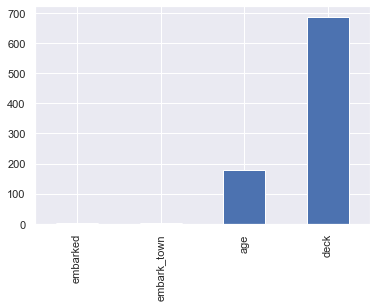

In [34]:
missing = df_copy.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

Or, in numbers:

In [35]:
total = df_copy.isnull().sum().sort_values(ascending=False)
percent = (df_copy.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
deck,687,0.771044
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


77% of the 'deck' column is null. I would normally drop a column with this many NaNs before doing any machine learning modeling. 

In [36]:
df_copy.drop(columns=['deck'], inplace=True)

And, it is **always** smart to check your work to make what you think happened actually happened.

In [37]:
total = df_copy.isnull().sum().sort_values(ascending=False)
percent = (df_copy.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
age,177.0,0.198653
embarked,2.0,0.002245
embark_town,2.0,0.002245
survived,0.0,0.000000
pclass,0.0,0.000000
sex,0.0,0.000000
sibsp,0.0,0.000000
parch,0.0,0.000000
fare,0.0,0.000000
class,0.0,0.000000


Much better!

Now, on to...

# Apply

The `apply()` function is a bit of a "cheat code," to borrow video gamer terminology. `apply()` allows you to custom-write a function and apply it to rows, columns, or the entire dataframe, thus giving us the ability to create new functionality that isn't inherent in Pandas.

For example, let's look at the unique values in the `sex` column:

In [38]:
# df['embarked'].unique()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`sex` is actually a categorical variable that divides the Titanic passengers on the boat. In this way, it could serve as a sorting value for the passengers -- might be useful if we want to test the old "women and children first" saying. The problem is, machine learning algorithms don't like text (mostly). Scikit-Learn has functions to help us encode categorical columns like this, but let's do it manually to see how `apply()` works. 

We are going to write a little function that takes one variable as input (value of sex in any given row) and returns a numerical code. We will store that number in a new column called `gender`.

Remember, this is a demonstration. There are many ways to handle creating columns and re-categorizing content.

First, we are going to create a custom function that takes one variable as input:

In [39]:
def return_gender(sex):
    if sex == 'male':
        return 0
    elif sex  == 'female':
        return 1
    else:
        return -999

Then we will put it into the `apply()` function. The magic of `apply()` says if we use it on a specific column, `apply()` will go row by row, applying your function to the current value. That is why our function needs to take an input variable -- that is the row's value we want to change.

You may be wondering about the -999. That is just insurance in case there is something we don't expect in the column -- Someone misspelled 'male' as 'mail', perhaps. Most machine learning algorithms are smart enough to deal with these types of 'wildly different' entries, like -999, so they don't influence the model training. 

In [40]:
df['gender'] = df['sex'].apply(return_gender)

In [41]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


As you can see, we added the new column with values based on what is in the 'sex' column.

# Aggregating

*Reference: https://pbpython.com/groupby-agg.html*

Aggragating, in this context, means taking a bunch of values and using some summary function to return (usually) a single value. Most times, the summary function is a simple summation or mean. 

An example:

In [42]:
df['fare'].agg( ['sum', 'mean'] )  #extra spaces for clarity

sum     28693.949300
mean       32.204208
Name: fare, dtype: float64

In the example above, we passed a list of functions to `agg()` and got the results of each back out. 

There are multiple ways to call aggragation functions but, in my opinion, the most useful is using a dictionary. We will call the `agg()` function on the entire dataframe and pass it a dictionary where the keys are the column names and the values are functions to be applied.

```
df.agg( {'Fare' : ['sum', 'mean'],
         'Sex' : ['count'] } )
```

In [43]:
df.agg( {'fare' : ['sum', 'mean'],
         'sex' : ['count'] } )

,fare,sex
sum,28693.949300,NaN
mean,32.204208,NaN
count,NaN,891.0


Finally, the most-often used aggragation functions:

In [44]:
df['fare'].agg( ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod'] )

sum       28693.949300
mean         32.204208
median       14.454200
min           0.000000
max         512.329200
std          49.693429
var        2469.436846
mad          28.163692
prod          0.000000
Name: fare, dtype: float64

`mad` stands for 'mean absolute deviation'. `prod` is the product of all the entries in the column. Probably not that useful, but included for completeness. 

# Groupby

## Descriptive statistics 

The `groupby()` function adds a powerful ability to group aggragation results based on values in the 'fare' column. Let's do the last aggragation and group it by the embarkation city:

In [45]:
df.groupby(['embark_town']).agg( {'fare':['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod']} )

fare                                                 \
                    sum       mean median     min       max        std   
embark_town                                                              
Cherbourg    10072.2962  59.954144  29.70  4.0125  512.3292  83.912994   
Queenstown    1022.2543  13.276030   7.75  6.7500   90.0000  14.188047   
Southampton  17439.3988  27.079812  13.00  0.0000  263.0000  35.887993   

                                                    
                     var        mad           prod  
embark_town                                         
Cherbourg    7041.390607  53.024568  6.193716e+250  
Queenstown    201.300677   7.871543   6.458671e+78  
Southampton  1287.948067  21.299550   0.000000e+00

You could also run the `describe()` function with the grouping:

In [46]:
df.groupby(['embark_town']).agg ( {'fare' : 'describe'} ).round(2)

fare                                                
             count   mean    std   min    25%    50%   75%     max
embark_town                                                       
Cherbourg    168.0  59.95  83.91  4.01  13.70  29.70  78.5  512.33
Queenstown    77.0  13.28  14.19  6.75   7.75   7.75  15.5   90.00
Southampton  644.0  27.08  35.89  0.00   8.05  13.00  27.9  263.00

## Counting

It is also common to want to count values grouped various ways. 

Let's use `count()`, `nunique()`, and `size()` to show how passengers from different embarkation cities were spread over different decks:

In [47]:
df.groupby(['deck']).agg( {'embark_town' : ['count', 'nunique', 'size']} )

embark_town             
           count nunique size
deck                         
A             15       2   15
B             45       2   47
C             59       3   59
D             33       2   33
E             32       3   32
F             13       3   13
G              4       1    4

Notice for deck B the `count` and `size` are different. That is because `count()` skips NaNs but `size()` does not. Subtle distinction that you should be aware of. 

## Other functions

There is nothing restricting you to the built-in functions above when aggragating. 

For example, it is common when checking for normal distribution to want to check the skew:

In [48]:
from scipy.stats import skew, mode

In [49]:
df.groupby(['embark_town']).agg( {'fare': [skew, mode, pd.Series.mode]} )

fare                          
                 skew              mode    mode
embark_town                                    
Cherbourg    3.305112  ([7.2292], [15])  7.2292
Queenstown   4.265111    ([7.75], [30])  7.7500
Southampton  3.640276    ([8.05], [43])  8.0500

Here, you can also see that the scipy.stats version of `mode()` not only returned the most common value, it also shows the number of occurrences.

You can just as easily use your own functions as any of these. 

# Lambda functions

Speaking of your own functions, sometimes you need a little, single-use function and it really isn't worth the energy to go through the whole 

```
def some_function(x):
    blah
    blah
    blah
```

for times like that, we have **lambda functions**.

For example, let's assume you wanted to capitalize the `sex` column. An easy way to do that to the whole column is to use `apply()`, but `apply()` needs a function. Seems like a lot of work just to call the string's `capitalize()` function. 

Let's say I wanted a lambda function that just takes a string as input, calls the string's `capitalize()` function and returns the capitalized string. It would look something like this:

```
lambda s: s.capitalize()
```

That's it! `s` is our input variable and the result of whatever is on the right side of the `:` gets returned. We could even set a variable equal to it so it looks a bit more like a regular function. Let's see that in action.

In [50]:
caps = lambda s: s.capitalize()

caps('male')

'Male'

Basically, anything you can cram on one line is fair game. For loops are common, so are if-else conditions. Let's see one of those:

In [51]:
caps = lambda s: s.capitalize() if s == 'female' else s

In [52]:
caps('female')

'Female'

In [53]:
caps('male')

'male'

OK, what happened there? The logic makes sense if you read it left to right and add a word or two... 

"Return s.capitalize() if s is female, else return s."

Not so hard, right?

As I mentoned above, the whole `caps = ` this is just a name. Actually, more like a "handle" to store the lambda function in memory and be able to get it back. **But**, we generally don't use assignment like that when using lambda functions in `apply()` (or others). 

For example:

In [54]:
df['sex'] =  df['sex'].apply(lambda s: s.capitalize() if s == 'female' else s)

In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,Female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,Female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,Female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


# Formatting

Finally, a bit of fun. 

A recent update to Pandas allows formatting of cells and cell contents. This means displaying dollar cells with only 2 decimal places, fill min or max value backgrounds with a color, and more. This is accomplished using the dataframe `style.format()`.

Let's see some examples:

In [56]:
df.groupby(['embark_town']).agg( {'fare':['sum', 'mean', 'median', 'min', 'max']} ).style.format('${0:,.2f}')

Much of string formatting is a holdover from the old 'C' programming days and somewhat complicated. Google is your friend. 

Let's look at that same aggregation above but with no decimal places:

In [57]:
df.groupby(['embark_town']).agg( {'fare':['sum', 'mean', 'median', 'min', 'max']} ).style.format('${0:,.0f}')

Let's do the same thing and highlight min and max values. I know, not very exciting with only 3 rows, but it will get the idea across.

In [58]:
(df.groupby(['embark_town'])
.agg( {'fare':['sum', 'mean', 'median', 'min', 'max']} )
.style.format('${0:,.2f}')
.highlight_max(color = 'green')
.highlight_min(color='red'))